## D5 - m sample

In [ ]:
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

# init weight
eta = 0.01
theta = np.array([-0.34, 0.04]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

# delta for huber loss
delta = 5

losses = [] # for debug
for epoch in range(epoch_max):    
    for j in range(0, data_size, m):
        
        gradients = np.zeros((2,))
        sum_of_losses = 0         
        for index in range(j, j+m):
            xi = data[index]
            yi = prices[index]      

            # predict z/o
            oi = xi.dot(theta)

            # huber loss
            li = (oi - yi)**2 if abs(oi - yi) < delta else delta * abs(oi - yi) - 0.5 * delta**2

            # compute gradient
            g_li = 2*(oi - yi) if abs(oi - yi) < delta else delta * (oi - yi) / abs(oi - yi)
            gradient_i = xi*g_li

            gradients = gradients + gradient_i
            sum_of_losses = sum_of_losses + li

        sum_of_losses = sum_of_losses/2
        losses.append(sum_of_losses)
        
        gradients     = gradients/2
        theta = theta - eta*gradients

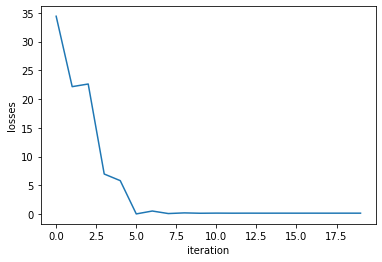

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

## D6 - m Samples _ vectorization

In [ ]:
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

# init weight
eta = 0.01
theta = np.array([[-0.34], [0.04]]) #[w, b]

# how long
epoch_max = 10

# mini-batch size
m = 2

# delta for huber loss
delta = 5

losses = [] # for debug
for epoch in range(epoch_max):
    for i in range(0, data_size, m):        
        # get m samples
        x = data[:, i:i+m]
        y = prices[i:i+m, :]
        
        # predict z/o
        z = theta.T.dot(x)
          
        # huber loss
        hl_idx = abs(z - y.T) >= delta
        
        loss = (z - y.T) ** 2
        loss[hl_idx] = delta * abs((z - y.T)[hl_idx]) - 0.5 * delta**2
        losses.append(np.mean(loss))

        # compute gradient
        b = 2*(z-y.T)
        b[hl_idx] = delta * ((z - y.T)[hl_idx]) / abs((z - y.T)[hl_idx])
        gradients = np.multiply(x, np.vstack((b, b)))
        gradients = gradients.dot(np.ones((m, 1)))/m

        # update weights
        theta = theta - eta*gradients

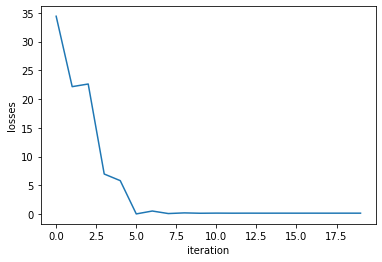

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

## D7 - N Samples 

In [ ]:
# full code

# load data
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]

n_epochs = 10
eta = 0.01

theta = np.array([[-0.34],[0.04]])

losses = [] # for debug
for epoch in range(n_epochs):
    sum_of_losses = 0
    gradients = np.zeros((2,1))
    
    for index in range(data_size):
        xi = data[index:index+1]
        yi = prices[index:index+1]

        oi = xi.dot(theta)
        li = (oi - yi)**2 if abs(oi - yi) < delta else delta * abs(oi - yi) - 0.5 * delta**2      
        g_li = 2*(oi - yi) if abs(oi - yi) < delta else delta * (oi - yi) / abs(oi - yi)
        
        cg = xi.T.dot(g_li)
        
        gradients = gradients + cg
        sum_of_losses = sum_of_losses + li
    
    sum_of_losses = sum_of_losses/data_size   
    losses.append(sum_of_losses[0][0]) 
    
    gradients     = gradients/data_size    
    theta = theta - eta*gradients    

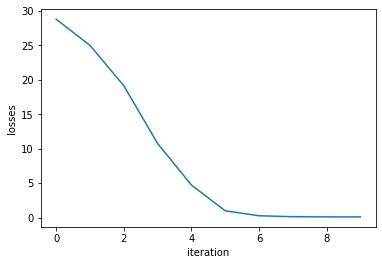

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()

##  D8 - N Samples - Vectorization

In [ ]:
# full code
import numpy as np
from numpy import genfromtxt

data = genfromtxt('data.csv', delimiter=',')
areas  = data[:,0]
prices = data[:,1:]
data_size = areas.size

# vector [x, b]
data = np.c_[areas, np.ones((data_size, 1))]
data = data.T

n_epochs = 10
eta = 0.01

# init weight
theta = np.array([[-0.34],[0.04]])

losses = [] # for debug
for epoch in range(n_epochs):
    # compute output
    z = theta.T.dot(data)

    # huber loss
    hl_idx = abs(z - prices.T) >= delta
    loss = (z - prices.T) ** 2
    loss[hl_idx] = delta * abs((z - prices.T)[hl_idx]) - 0.5 * delta**2
    
    losses.append(np.mean(loss))
    
    # compute gradient
    b = 2*(z-prices.T)    
    b[hl_idx] = delta * ((z - prices.T)[hl_idx]) / abs((z - prices.T)[hl_idx])
    gradient = np.multiply(data, np.vstack((b, b)))
    gradient = gradient.dot(np.ones((data_size, 1)))/data_size
    
    # update weights
    theta = theta - eta*gradient

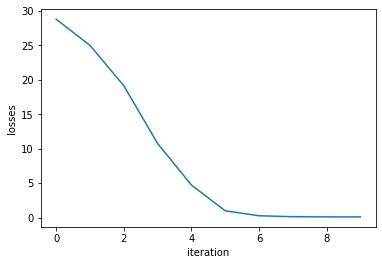

In [ ]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('losses')
plt.show()